# Simple MNIST convnet

**Author:** [vstile](https://linktr.ee/vstile)<br>
**Date created:** 2023/09/29<br>
**Last modified:** 2023/10/17<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
# Create a convolutional neural network model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Compile the model

In [4]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Train the model

In [5]:
batch_size = 128
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 16s 6ms/step - loss: 0.3661 - accuracy: 0.8908 - val_loss: 0.0837 - val_accuracy: 0.9778
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1121 - accuracy: 0.9654 - val_loss: 0.0564 - val_accuracy: 0.9847
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9742 - val_loss: 0.0470 - val_accuracy: 0.9878
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.0396 - val_accuracy: 0.9883
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0344 - val_accuracy: 0.9897
Epoch

## Evaluate the trained model

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Test loss: 0.0262
Test accuracy: 0.9904


Mounted at /content/gdrive
1/1 [==============================] - 0s 20ms/step


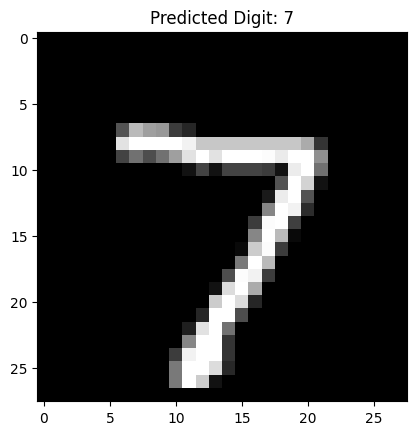

In [11]:
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
drive.mount('/content/gdrive', force_remount=True)

# Load and preprocess your image
custom_image = cv2.imread('/content/gdrive/MyDrive/seven.png', cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
custom_image = cv2.resize(custom_image, (28, 28))  # Resize to match the MNIST input shape
custom_image = custom_image.astype("float32") / 255  # Scale to [0, 1]
custom_image = np.expand_dims(custom_image, -1)  # Add a channel dimension
custom_image = np.expand_dims(custom_image, 0)  # Add a batch dimension

# Make predictions on the custom image
predictions = model.predict(custom_image)

# Get the predicted class (digit)
predicted_class = np.argmax(predictions)

# Display the results
plt.imshow(custom_image[0, :, :, 0], cmap='gray')  # Display the custom image
plt.title(f"Predicted Digit: {predicted_class}")
plt.show()
